In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

Data Gathering Lab 2
--------------------

Imports

In [2]:
#%autoreload     # This is Jupyter notebook that will reload changed files
from crawler import Crawler
from crawler_state import CrawlerState
from crawler_abst_api import CrawlerAbstractAPI
from crawler_my_api import MyAPI
from crawler_twitter_api import TwitterApi

## Note on Nodes
Nodes in the network have special bookkeeping attributes. These should not be changed. The content attributes will vary based on your specific application.
### Bookkeeping Attributes
- `id` -- attribute based on the order instantiated via the crawl. Note that it must be converted from a number to a string so that it can be read back in again from GraphML.
- `_expanded` -- 1 if the nodes children have been generated
- `_depth` -- the distance of this node from the origin node or nodes

### Content Attributes
It's a silly example where users have random names and associated random planets. Users are connected via a small number of randomly-generated tags.
- `label` -- the name of the user (user nodes only) or the tag string (tag nodes only)
- `planet` -- the planet the user is from (user nodes only)
- `bipartite` -- will be 0 from users and 1 for tags


# Tests for MyAPI
Not very rigorous testing

In [3]:
# api = MyAPI()
api = TwitterApi()
c = Crawler(2, api)

In [4]:
setup = api.initial_nodes()
if setup[0][0] == '#TeamJB' and setup[0][1] == '100':
    print('initial_node seems to be working')

initial_node seems to be working


In [5]:
# names_query = api.make_names_url('#Foo Bar')
# if names_query == 'http://josquin.cti.depaul.edu/~rburke/cgi-bin/get-users.py?q=%23Foo+Bar':
#     print('make_names_url seems to be working')

In [6]:
# tags_query = api.make_tags_url('John Doe')
# if tags_query == 'https://api.twitter.com/1.1/search/tweets.json?q=John+Doe&result_type=recent&lang=en&count=100&max_id=':
#     print('make_tags_url seems to be working')
# tags_query

In [7]:
user_node = api.make_node_user("John Doe", "Earth", 1)
if c._net.nodes[user_node]['planet'] == "Earth":
    print('make_node_user seems to be working')

KeyError: 'planet'

In [ ]:
# tag_node = api.make_node_tag('#Foo Bar', 1)
# if (c._net.nodes[tag_node]['label'] == '#Foo Bar'):
#     print('make_node_tag seems to be working')

In [ ]:
# result = api.execute_names_query('#Foo')
# if result[0] and type(result[1] is list):
#     print('execute_names_query seems to be working')

In [ ]:
# result = api.execute_tags_query('#TeamJB')
# print(result)
# if result[0] and type(result[1] is list):
#     print('execute_tags_query seems to be working')

# For the Lab

In [8]:
api = TwitterApi()
# api = MyAPI()
c = Crawler(3, api)
c.initialize()

In [9]:
c.crawl_k(2)

Expanding node: 100
Expanding node: 101


True

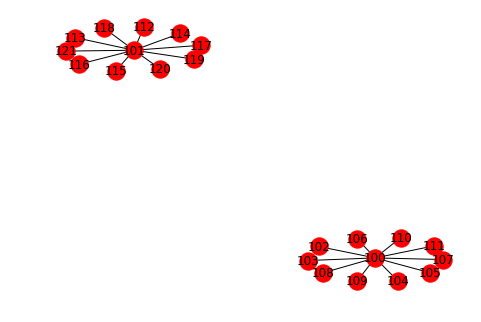

In [10]:
nx.draw(c._net, with_labels=True)

In [11]:
c._state._open

deque(['102',
       '103',
       '104',
       '105',
       '106',
       '107',
       '108',
       '109',
       '110',
       '111',
       '112',
       '113',
       '114',
       '115',
       '116',
       '117',
       '118',
       '119',
       '120',
       '121'])

In [12]:
list(c._net.nodes(data=True))

[('100', {'label': '#TeamJB', 'bipartite': 1, '_depth': 0, '_expanded': 1}),
 ('101',
  {'label': '#TeamRauner', 'bipartite': 1, '_depth': 0, '_expanded': 1}),
 ('102',
  {'label': 'IllinoisforKash',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('103',
  {'label': 'michaelgmangan',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('104',
  {'label': 'toreycahn',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('105',
  {'label': 'MartinVTorres',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('106',
  {'label': 'MartinVTorres',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('107',
  {'label': 'IllinoisforKash',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('108',
  {'label': 'clearlytlc',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 0,
   'tag': '#TeamJB'}),
 ('109',
  {'label': 'NPemZ',
   'bip

In [13]:
c._state._visited0

{'IllinoisforKash': '107',
 'michaelgmangan': '103',
 'toreycahn': '104',
 'MartinVTorres': '106',
 'clearlytlc': '108',
 'NPemZ': '109',
 'fidelrecruits': '111',
 'wimvisscher777': '112',
 'AssyrianGOP': '113',
 'BrianB_GOP': '114',
 'Joshdewitt11': '115',
 'native4trump': '116',
 'sc08960854': '117',
 'Daisy49103': '118',
 'americageddon': '119',
 'HBronnenberg2': '120',
 'AmericaFirst150': '121'}

In [14]:
c._state._visited1

{'#TeamJB': '100', '#TeamRauner': '101'}

In [15]:
c.to_files("out.graphml", "out.json")
len(c._net.nodes())

22

In [16]:
c2 = Crawler(5, api)
c2.from_files("out.graphml", "out.json")

In [17]:
c2.crawl_k(15)

Expanding node: 102
Expanding node: 103
Expanding node: 104
Expanding node: 105
Expanding node: 106
Expanding node: 107
Expanding node: 108
Expanding node: 109
Expanding node: 110
Expanding node: 111
Expanding node: 112
Expanding node: 113
Expanding node: 114
Expanding node: 115
Expanding node: 116


True

In [18]:
list(c2._net.nodes(data=True))

[('100', {'label': '#TeamJB', 'bipartite': 1, '_depth': 0, '_expanded': 1}),
 ('101',
  {'label': '#TeamRauner', 'bipartite': 1, '_depth': 0, '_expanded': 1}),
 ('102',
  {'label': 'IllinoisforKash',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('103',
  {'label': 'michaelgmangan',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('104',
  {'label': 'toreycahn',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('105',
  {'label': 'MartinVTorres',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('106',
  {'label': 'MartinVTorres',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('107',
  {'label': 'IllinoisforKash',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('108',
  {'label': 'clearlytlc',
   'bipartite': 0,
   '_depth': 1,
   '_expanded': 1,
   'tag': '#TeamJB'}),
 ('109',
  {'label': 'NPemZ',
   'bip

In [20]:
len(c2._net.nodes())

53

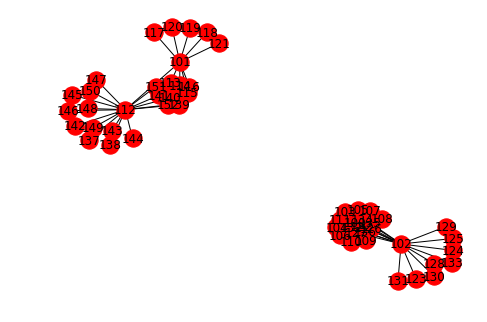

In [21]:
nx.draw(c2._net, with_labels=True)

In [22]:
labels = [data['label'] for node, data in c2._net.nodes(data=True)]
labels

['#TeamJB',
 '#TeamRauner',
 'IllinoisforKash',
 'michaelgmangan',
 'toreycahn',
 'MartinVTorres',
 'MartinVTorres',
 'IllinoisforKash',
 'clearlytlc',
 'NPemZ',
 'fidelrecruits',
 'fidelrecruits',
 'wimvisscher777',
 'AssyrianGOP',
 'BrianB_GOP',
 'Joshdewitt11',
 'native4trump',
 'sc08960854',
 'Daisy49103',
 'americageddon',
 'HBronnenberg2',
 'AmericaFirst150',
 'GetAWarrant',
 'TeamJB',
 'TeamJB',
 'TeamJB',
 'EarlyVoting',
 'twill',
 'TeamJB',
 'Pritzker',
 'Raoul',
 'TeamJB',
 '7days',
 'TeamJB',
 'Pritzker',
 'Raoul',
 'TeamJB',
 'Libertarian',
 'Veteran',
 'TeamRauner',
 'BackBruce',
 'chicago',
 'Libertarian',
 'Veteran',
 'Libertarian',
 'Veteran',
 'Libertarian',
 'Libertarian',
 'Veteran',
 'Libertarian',
 'Veteran',
 'Libertarian',
 'Veteran']

In [ ]:
c3 = Crawler(3, api)
c3.initialize()
c3.set_autosave(5, "save/")

In [ ]:
c3.crawl_k(10)